## Importing all the essential libraries

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob

## Setting initial parameters

In [3]:
# initial parameters
epochs = 100
lr = 1e-3
batch_size = 64
img_dims = (96,96,3)

In [4]:
data = []
labels = []

## Loading images file from dataset

In [5]:
# load image files from the dataset
image_files = [f for f in glob.glob(r'C:\Users\Vijendra\Downloads\Gender-Detection-master\Gender-Detection-master\gender_dataset_face' + "/**/*", recursive=True) if not os.path.isdir(f)]
random.shuffle(image_files)


## Converting images to arrays and labelling the categories


In [6]:
# converting images to arrays and labelling the categories
for img in image_files:

    image = cv2.imread(img)
    
    image = cv2.resize(image, (img_dims[0],img_dims[1]))  #resize the image 96x96
    image = img_to_array(image)
    data.append(image)

    label = img.split(os.path.sep)[-2] # C:\Users\Vijendra\Downloads\Gender-Detection-master\Gender-Detection-master\gender_dataset_face\woman\face_1162.jpg
    if label == "woman":
        label = 1
    else:
        label = 0
        
    labels.append([label]) # [[1], [0], [0], ...]

In [7]:
# pre-processing
data = np.array(data, dtype="float") / 255.0  #coverting list to array
labels = np.array(labels)


## Split dataset for training and validation


In [8]:
# split dataset for training and validation
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2,
                                                  random_state=42)


In [9]:
trainY = to_categorical(trainY, num_classes=2) # [[1, 0], [0, 1], [0, 1], ...]
testY = to_categorical(testY, num_classes=2)   #two dimensional array


In [12]:
# augmenting datset 
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")


In [15]:
# define model
def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format() == "channels_first": #Returns a string, either 'channels_first' or 'channels_last'
        inputShape = (depth, height, width)
        chanDim = 1
    
    # The axis that should be normalized, after a Conv2D layer with data_format="channels_first", 
    # set axis=1 in BatchNormalization.

    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))  #BatchNorm is usually done to keep the mean activation close to zero and std close to 1...
    model.add(MaxPooling2D(pool_size=(3,3)))    #genrally applied to reduce noise in datset
    model.add(Dropout(0.25))                     #to avoid overfitiing problem

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())                  #converts 2d to 1d
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))            

    model.add(Dense(classes))
    model.add(Activation("sigmoid"))    #output layer

    return model

In [17]:
# build model
model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2],
                            classes=2)

In [19]:
# compile the model
opt = Adam(lr=lr, decay=lr/epochs)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

In [21]:
# train the model
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),
                        validation_data=(testX,testY),
                        steps_per_epoch=len(trainX) // batch_size,
                        epochs=epochs, verbose=1)

C:\Users\Vijendra\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/100
28/28 [==============================] - 38s 1s/step - loss: 0.6970 - accuracy: 0.7406 - val_loss: 0.9055 - val_accuracy: 0.5152
Epoch 2/100
28/28 [==============================] - 33s 1s/step - loss: 0.4397 - accuracy: 0.8321 - val_loss: 0.9837 - val_accuracy: 0.5152
Epoch 3/100
28/28 [==============================] - 35s 1s/step - loss: 0.4145 - accuracy: 0.8417 - val_loss: 1.1890 - val_accuracy: 0.4848
Epoch 4/100
28/28 [==============================] - 36s 1s/step - loss: 0.3680 - accuracy: 0.8725 - val_loss: 1.4429 - val_accuracy: 0.4848
Epoch 5/100
28/28 [==============================] - 34s 1s/step - loss: 0.3132 - accuracy: 0.8871 - val_loss: 2.4982 - val_accuracy: 0.4848
Epoch 6/100
28/28 [==============================] - 40s 1s/step - loss: 0.3213 - accuracy: 0.8888 - val_loss: 3.2629 - val_accuracy: 0.4848
Epoch 7/100
28/28 [==============================] - 39s 1s/step - loss: 0.2897 - accuracy: 0.8989 - val_loss: 1.9416 - val_accuracy: 0.4848
Epoch 8/100
2

Epoch 59/100
28/28 [==============================] - 40s 1s/step - loss: 0.0757 - accuracy: 0.9714 - val_loss: 0.4624 - val_accuracy: 0.8636
Epoch 60/100
28/28 [==============================] - 37s 1s/step - loss: 0.0694 - accuracy: 0.9759 - val_loss: 0.8531 - val_accuracy: 0.7684
Epoch 61/100
28/28 [==============================] - 37s 1s/step - loss: 0.0730 - accuracy: 0.9725 - val_loss: 0.1362 - val_accuracy: 0.9524
Epoch 62/100
28/28 [==============================] - 41s 1s/step - loss: 0.0715 - accuracy: 0.9759 - val_loss: 0.1631 - val_accuracy: 0.9524
Epoch 63/100
28/28 [==============================] - 40s 1s/step - loss: 0.0524 - accuracy: 0.9826 - val_loss: 0.1868 - val_accuracy: 0.9459
Epoch 64/100
28/28 [==============================] - 41s 1s/step - loss: 0.0509 - accuracy: 0.9787 - val_loss: 0.1629 - val_accuracy: 0.9567
Epoch 65/100
28/28 [==============================] - 41s 1s/step - loss: 0.0623 - accuracy: 0.9775 - val_loss: 0.1257 - val_accuracy: 0.9567
Epoch 

In [14]:
# save the model to disk
model.save('gender_detection1.model')

INFO:tensorflow:Assets written to: gender_detection1.model\assets


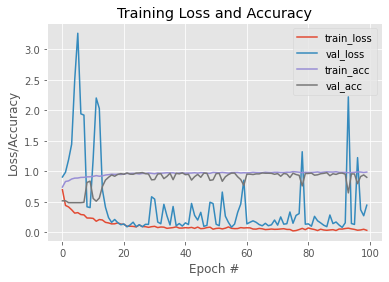

In [26]:
# plot training/validation loss/accuracy
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0,N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,N), H.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")


In [19]:
# save plot to disk
plt.savefig('plot2.png')

<Figure size 432x288 with 0 Axes>